# Análisis de un conjunto de datos de origen biológico mediante técnicas de _machine learning_ supervisadas y no supervisadas 

## Librerías

In [30]:
# Librerías necesarias para manipular datos
import pandas as pd
from pathlib import Path

# Librerías para crear gráficos
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import hvplot.pandas

# Librerías para crear el dendograma
from scipy.cluster.hierarchy import dendrogram, linkage

# Librerias para los métodos supervisados y no supervisados
from sklearn.manifold import Isomap # Para realizar Isomap
from sklearn.decomposition import PCA # Para realizar PCA
from sklearn.preprocessing import StandardScaler # Permite normalizar
from sklearn.impute import KNNImputer # Permite la imputación
import numpy as np
from sklearn.metrics import euclidean_distances
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score


# Librerías para evaluación de modelos
from sklearn.metrics import roc_curve, auc, classification_report

# Importación de Datos

In [31]:
# Cargamos los nombres de las columnas

with open("./data/column_names.txt", "r") as file:
    nombres_columnas = file.read().splitlines()

# Leemos el archivo gene_expression

datos = pd.read_csv("./data/gene_expression.csv", delimiter=";", dtype=str, header=None)
datos.columns = nombres_columnas

#Convertimos las columnas de expresión génica a numéricas
columnas_expresion_genica = datos.columns[0:]  

for columna in columnas_expresion_genica:
    datos[columna] = pd.to_numeric(datos[columna], errors='coerce')

datos.dtypes



DUOXA1     float64
INTU       float64
UMOD       float64
STXBP4     float64
PARN       float64
            ...   
GASK1A     float64
TMEM114    float64
UCN        float64
RAB25      float64
TTC31      float64
Length: 500, dtype: object

In [32]:

# Leemos el archivo classes
archivo2 = pd.read_csv("./data/classes.csv", delimiter=";", dtype=str, header=None)
archivo2.columns = ["Sample", "Classes"]

# Se fusionan los dataframes
resultado = pd.concat([archivo2, datos], axis=1)

# Se guarda el resultado en un nuevo csv
resultado.to_csv("resultado_fusion.csv", index=False)

# Leemos el csv resultante en un dataframe
resultado_final_final = pd.read_csv("resultado_fusion.csv")

# Visualizamos las 10 primeras filas
resultado_final_final.head(10)

resultado_final_final.set_index("Sample", inplace=True)
resultado_final_final.head(10)

,Classes,DUOXA1,INTU,UMOD,STXBP4,PARN,TSC22D4,TTLL5,ZNF880,SPATA1,...,NPTN,BCAR3,PVALB,PTPN11,C19orf33,GASK1A,TMEM114,UCN,RAB25,TTC31
Sample,,,,,,,,,,,,,,,,,,,,,
sample_0,CHC,11.881389,10.282579,11.532989,9.818951,8.936338,8.479877,7.319582,9.052508,6.008866,...,3.017958,11.364512,9.507309,0.000000,6.190143,9.805113,10.876141,7.014690,0.0,9.713964
sample_1,CGC,10.405641,9.816923,10.691979,7.619750,8.349710,10.296480,9.360250,9.148949,7.210837,...,1.004394,10.854261,9.678533,1.174790,0.323658,4.828642,7.183635,5.030870,0.0,11.081909
sample_2,CHC,11.609170,9.701637,11.710367,8.883569,7.627724,8.245710,5.228084,10.658970,7.830509,...,0.452595,10.457073,8.876802,0.000000,0.796598,5.897010,8.324109,0.796598,0.0,10.195298
sample_3,CHC,11.922172,10.301290,9.662613,9.003394,6.772823,7.984322,5.218564,10.102816,8.319085,...,1.267356,11.354034,8.916787,0.000000,1.931418,7.624240,10.749836,6.469165,0.0,10.098190
sample_4,CFB,10.811174,10.275636,9.582229,10.373474,7.510693,9.654743,7.597956,9.184303,7.279471,...,2.612801,10.978038,8.692664,0.000000,6.254220,8.100505,10.041591,6.306973,0.0,10.549900
sample_5,CHC,11.425121,10.220294,10.700023,8.862876,8.672574,8.369619,7.499088,9.803579,7.169725,...,2.002018,10.803461,9.082162,0.515410,4.718789,7.951040,9.663948,8.570360,0.0,10.494246
sample_6,AGH,10.912800,11.039522,11.376212,9.243157,8.792026,11.873875,8.478867,9.485839,6.149656,...,7.035437,10.999556,9.055242,0.919683,6.131423,8.080700,10.050257,6.570924,0.0,10.360704
sample_7,CHC,11.646856,10.763221,11.035356,9.687759,8.931568,9.359045,8.437769,9.624989,6.812883,...,2.304861,10.992620,8.899454,1.481041,4.602237,7.293315,10.615207,6.110113,0.0,9.932206
sample_8,CFB,10.966109,11.099946,9.108621,9.621543,7.439739,9.739215,5.036147,10.474294,10.622143,...,3.559296,9.725138,9.482854,0.635336,7.428201,8.170611,9.975174,5.963724,0.0,10.584699


# Depurado de los datos

In [33]:
# Verificamos si hay valores nulos

total_nan = resultado_final_final.isna().sum().sum()
print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 0


In [34]:
# Se eliminan las columnas donde al menos hay un elemento NaN

data_clean = resultado_final_final.dropna(axis=1, how="any")

# Muestra el tamaño del DataFrame con los datos limpios

data_clean.shape

(801, 501)

In [35]:
# Verificar los tipos de datos

resultado_final_final.dtypes

Classes     object
DUOXA1     float64
INTU       float64
UMOD       float64
STXBP4     float64
            ...   
GASK1A     float64
TMEM114    float64
UCN        float64
RAB25      float64
TTC31      float64
Length: 501, dtype: object

In [36]:
# Eliminamos las columnas "Sample" y "Classes" por representar variables no numéricas

data_clean = resultado_final_final.drop(["Classes"], axis=1)

In [37]:
# Imputación de los datos

#Creamos y aplicamos el KNNImputer
imputador_knn = KNNImputer(n_neighbors=5)

# Realizar la imputación
datos_imputados = pd.DataFrame(imputador_knn.fit_transform(data_clean), columns=data_clean.columns)

# Guardar los datos imputados en un nuevo archivo CSV
datos_imputados.to_csv("datos_imputados.csv", index=False)

datos_imputados.head(10)


,DUOXA1,INTU,UMOD,STXBP4,PARN,TSC22D4,TTLL5,ZNF880,SPATA1,PLIN3,...,NPTN,BCAR3,PVALB,PTPN11,C19orf33,GASK1A,TMEM114,UCN,RAB25,TTC31
0,11.881389,10.282579,11.532989,9.818951,8.936338,8.479877,7.319582,9.052508,6.008866,0.591871,...,3.017958,11.364512,9.507309,0.000000,6.190143,9.805113,10.876141,7.014690,0.0,9.713964
1,10.405641,9.816923,10.691979,7.619750,8.349710,10.296480,9.360250,9.148949,7.210837,0.000000,...,1.004394,10.854261,9.678533,1.174790,0.323658,4.828642,7.183635,5.030870,0.0,11.081909
2,11.609170,9.701637,11.710367,8.883569,7.627724,8.245710,5.228084,10.658970,7.830509,0.000000,...,0.452595,10.457073,8.876802,0.000000,0.796598,5.897010,8.324109,0.796598,0.0,10.195298
3,11.922172,10.301290,9.662613,9.003394,6.772823,7.984322,5.218564,10.102816,8.319085,0.000000,...,1.267356,11.354034,8.916787,0.000000,1.931418,7.624240,10.749836,6.469165,0.0,10.098190
4,10.811174,10.275636,9.582229,10.373474,7.510693,9.654743,7.597956,9.184303,7.279471,1.275841,...,2.612801,10.978038,8.692664,0.000000,6.254220,8.100505,10.041591,6.306973,0.0,10.549900
5,11.425121,10.220294,10.700023,8.862876,8.672574,8.369619,7.499088,9.803579,7.169725,0.000000,...,2.002018,10.803461,9.082162,0.515410,4.718789,7.951040,9.663948,8.570360,0.0,10.494246
6,10.912800,11.039522,11.376212,9.243157,8.792026,11.873875,8.478867,9.485839,6.149656,2.042924,...,7.035437,10.999556,9.055242,0.919683,6.131423,8.080700,10.050257,6.570924,0.0,10.360704
7,11.646856,10.763221,11.035356,9.687759,8.931568,9.359045,8.437769,9.624989,6.812883,0.441802,...,2.304861,10.992620,8.899454,1.481041,4.602237,7.293315,10.615207,6.110113,0.0,9.932206
8,10.966109,11.099946,9.108621,9.621543,7.439739,9.739215,5.036147,10.474294,10.622143,0.000000,...,3.559296,9.725138,9.482854,0.635336,7.428201,8.170611,9.975174,5.963724,0.0,10.584699
9,10.892975,9.465795,10.820450,10.216249,7.430243,7.652221,7.001566,9.730042,8.662626,0.000000,...,3.244278,11.530314,9.016900,1.204141,4.793475,9.712211,10.765311,6.910673,0.0,10.379086


In [38]:
# Comprobamos de nuevo el número de N

total_nan = datos_imputados.isna().sum().sum()

print(f"Número total de valores nulos: {total_nan}")

Número total de valores nulos: 0


In [39]:
# Estandarización de los datos
scaler = StandardScaler() # Crea una instancia de StandardScaler

# Estandariza los datos utilizando la instancia de StandarScaler
data_standardized = scaler.fit_transform(datos_imputados)

# Muestra los datos estandarizados
data_standardized[10]

array([-0.52719289,  0.03799673, -0.33097502,  1.31398697,  0.44274012,
       -0.42604884,  1.03068631, -0.59604533, -0.82784633, -0.61994276,
        0.65289205, -0.3919986 ,  0.02170225, -0.83338718, -0.62409474,
        0.75438102, -0.42839099,  0.71102472,  1.08905229, -0.53751245,
        1.03643823,  2.21639518,  0.93203763,  1.07351884,  0.89110733,
        0.19189257, -1.04938297,  0.90478798,  1.80418151,  1.22245693,
        0.66414045,  0.75065228,  1.18257137, -0.74754916,  1.97536768,
       -0.39841341,  0.37549789,  0.33610394, -0.1322398 , -0.62400906,
       -0.52321383, -1.00731881,  0.037195  ,  0.28124685, -0.18409133,
       -0.28065107, -0.97901542, -0.40147621, -0.44795008,  0.48668504,
       -0.42123054,  0.58397029,  0.45447873, -0.08424339,  0.77243538,
        0.16187482,  0.38908762, -1.12309539,  0.85598554, -0.09182985,
       -0.22185323,  1.23064635,  0.46615033,  0.22396357, -0.66837386,
        0.17766313, -0.66277707, -0.65446374, -0.01446589,  0.43

# Métodos no supervisados


## PCA

In [40]:
# PCA para 2 componentes
pca_2d = PCA(n_components=2)
components_2d = pca_2d.fit_transform(data_standardized)

# PCA para 3 componentes
pca_3d = PCA(n_components=3)
components_3d = pca_3d.fit_transform(data_standardized)

In [41]:
# Varianza explicada para 2 y 3 componentes
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

# Cálculo de la varianza explicada acumulada
cumulative_variance_2d = explained_variance_2d.sum()
cumulative_variance_3d = explained_variance_3d.sum()

# Mostrar resultados
print(f"Varianza explicada PCA2: {explained_variance_2d}")
print(f"Varianza acumulada PCA2: {cumulative_variance_2d}")
print(f"Varianza explicada PCA3: {explained_variance_3d}")
print(f"Varianza acumulada PCA3: {cumulative_variance_3d}")

Varianza explicada PCA2: [0.12386014 0.09433663]
Varianza acumulada PCA2: 0.2181967723800024
Varianza explicada PCA3: [0.12386014 0.09433663 0.08701378]
Varianza acumulada PCA3: 0.3052105534289821


## Isometric mapping (Isomap)

In [42]:
# Isomap para 2 componentes
isomap_2d = Isomap(n_components=2)
isomap_componentes_2d = isomap_2d.fit_transform(data_standardized)

# Isomap para 3 componentes
isomap_3d = Isomap(n_components=3)
isomap_componentes_3d = isomap_3d.fit_transform(data_standardized)

In [43]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_2d = isomap_2d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_2d = euclidean_distances(isomap_componentes_2d)

# Calcular el error de reconstrucción
error_reconstruccion_2d = np.mean((distancias_geodesicas_2d - distancias_reducidas_2d)**2)

print("Error de reconstrucción 2D:", error_reconstruccion_2d)

Error de reconstrucción 2D: 1463.4353955802515


In [44]:
# Calcular las distancias geodésicas en el espacio original
# Nota: Isomap almacena las distancias geodésicas en su atributo 'training_data_'
distancias_geodesicas_3d = isomap_3d.dist_matrix_

# Calcular las distancias en el espacio transformado
distancias_reducidas_3d = euclidean_distances(isomap_componentes_3d)

# Calcular el error de reconstrucción
error_reconstruccion_3d = np.mean((distancias_geodesicas_3d - distancias_reducidas_3d)**2)

print("Error de reconstrucción 3D:", error_reconstruccion_3d)

Error de reconstrucción 3D: 651.8745581782568


## K-means


In [45]:
# Representacion grafica sin agrupar
data_clustered = pd.DataFrame(data_standardized, columns=columnas_expresion_genica)

# Visualizando datos
data_clustered.hvplot.scatter(
    x=data_clustered.columns[0],
    y=data_clustered.columns[1],
    title="Datos sin clusters")



:Scatter   [DUOXA1]   (INTU)

In [46]:
# Creamos la instancia del modelo de K-means

kmeans_3 = KMeans(n_clusters=3, random_state=0)
kmeans_3.fit(data_standardized)

data_clustered["cluster_3"] = kmeans_3.labels_
# Visualizando datos
data_clustered.hvplot.scatter(
    x=data_clustered.columns[0],
    y=data_clustered.columns[1],
    by='cluster_3',
    title="3 clusters")


:NdOverlay   [cluster_3]
   :Scatter   [DUOXA1]   (INTU)

Nuestra información tiene alta dimensionalidad, lo que puede estar afectando a la formación de grupos.
Aplicamos el metodo de agrupamiento al resultado de la PCA para dos dimensiones.

In [47]:
# Representacion grafica sin agrupar
pca2d_clustered = pd.DataFrame(components_2d, columns=["PC1", "PC2"])

# Visualizando datos
pca2d_clustered.hvplot.scatter(
    x=pca2d_clustered.columns[0],
    y=pca2d_clustered.columns[1],
    title="Componentes 2D sin clusters")


:Scatter   [PC1]   (PC2)

In [48]:
# Creamos nueva la instancia del modelo de K-means: para 3 grupos

kmeans_pc2d = KMeans(n_clusters=3, random_state=0)
kmeans_pc2d.fit(pca2d_clustered)

pca2d_clustered["cluster_3"] = kmeans_pc2d.labels_
# Visualizando datos
pca2d_clustered.hvplot.scatter(
    x=pca2d_clustered.columns[0],
    y=pca2d_clustered.columns[1],
    by='cluster_3',
    title="3 clusters")


:NdOverlay   [cluster_3]
   :Scatter   [PC1]   (PC2)

Se aprecian 3 grupos bien segregados, aunque probablemente la distinción entre los grupos 0 y 1  sea un artfacto producto de la propia tecnica de reducciṕon aplicada.

## Clustering Jerárquico Aglomerativo

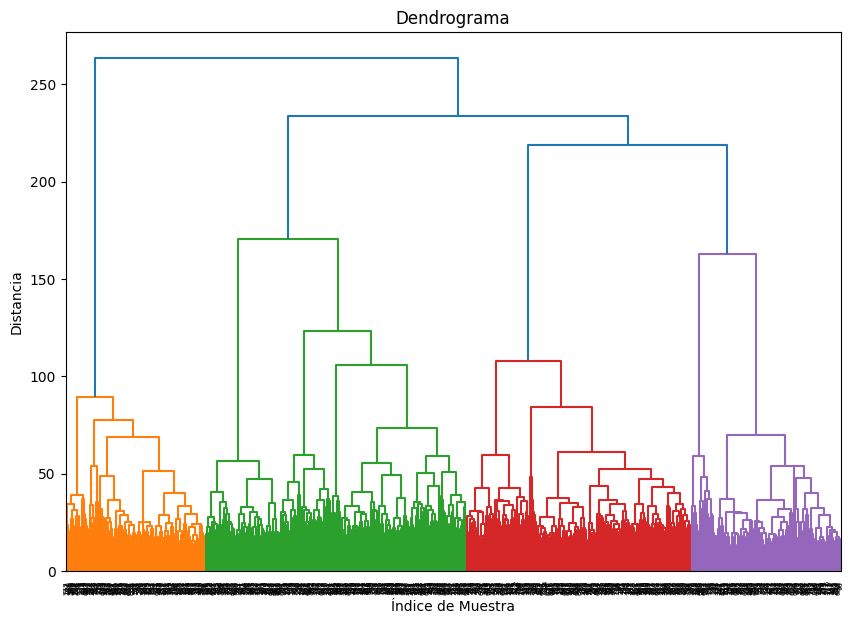

In [49]:
# Realizamos el clustering jerárquico
linked = linkage(data_standardized, 'ward')

# Visualización del dendograma

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrograma')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

# Métodos de aprendizaje supervisado

In [50]:
# Separar la variable objetivo (target) de las características
X = resultado_final_final.drop("Classes", axis=1)
y = resultado_final_final["Classes"]

In [51]:
# Normalizar y estandarizar 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [52]:
# Codificar y:
y.value_counts()

Classes
CFB    300
AGH    146
CGC    141
CHC    136
HPB     78
Name: count, dtype: int64

In [53]:
categorias = y.unique().tolist()
y_coded = y.apply(lambda v: categorias.index(v))

y_coded.value_counts()


Classes
2    300
3    146
1    141
0    136
4     78
Name: count, dtype: int64

In [54]:
# Definimos la semilla aleatoria
random_seed = 0

In [55]:
# Crear subconjuntos de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_coded, random_state=0)

In [56]:
# Inicializar los clasificadores
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

In [57]:
# Entrenar cada modelo y calcular métricas
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Imprimir las métricas
    print(f"Modelo: {name}")
    print("Matriz de confusión:")
    print(conf_matrix)
    print(f"Precisión: {precision}")
    print(f"Sensibilidad: {recall}")
    print(f"Especificidad: {accuracy}") 
    print(f"Puntuación F1: {f1}")
    print("\n")

Modelo: Logistic Regression
Matriz de confusión:
[[32  0  0  0  0]
 [ 0 33  0  0  0]
 [ 0  0 85  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 17]]
Precisión: 1.0
Sensibilidad: 1.0
Especificidad: 1.0
Puntuación F1: 1.0


Modelo: Support Vector Machine
Matriz de confusión:
[[31  0  1  0  0]
 [ 0 33  0  0  0]
 [ 0  0 85  0  0]
 [ 0  0  0 34  0]
 [ 0  0  0  0 17]]
Precisión: 0.995082725905357
Sensibilidad: 0.9950248756218906
Especificidad: 0.9950248756218906
Puntuación F1: 0.9949999376550831


Modelo: Decision Tree
Matriz de confusión:
[[28  1  3  0  0]
 [ 1 24  5  0  3]
 [ 1  1 83  0  0]
 [ 0  0  0 34  0]
 [ 0  0  1  0 16]]
Precisión: 0.922033717465597
Sensibilidad: 0.9203980099502488
Especificidad: 0.9203980099502488
Puntuación F1: 0.9183050182536078




**OJO** 
La curva roc no puede funcionar con nuestro juego de datos "y_test", porque espera una etiqueta binomial (pe: 0, 1) y nuestros datos de "clases" tienen 4 valores distintos.

Habría que elegir aplicar una transformación a binario para cada clase. y un grafico distinto

In [63]:

# Creamos y mostramos una representación ROC para cada modelo utilizado
for nombre, model in models.items():
    # Suponiendo que tienes las probabilidades de la clase positiva para cada modelo
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = auc(fpr, tpr)
    roc_df = pd.DataFrame({'FPR': fpr, 'TPR': tpr})
    roc_plot = roc_df.hvplot.line(
        x='FPR', 
        y='TPR', 
        label=f'{nombre} (AUC = {auc_score:.2f})',
        width=600, 
        height=400
    ).opts(title=f"Curva ROC de {nombre}")
    
    # Mostrar cada gráfico ROC
    display(roc_plot)

ValueError: multiclass format is not supported